In [1]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from numba import jit

import sys
sys.path.insert(0, '../fem')
from grf import GRF

In [55]:
l = 0.1
N_gridpoints = int(1/l) + 1
X, Y = np.mgrid[0:1:N_gridpoints*1j, 0:1:N_gridpoints*1j]
x_grid = np.vstack([X.ravel(), Y.ravel()]).T
cov = np.exp(-distance_matrix(x_grid,x_grid, p=2)**2/(l**2))

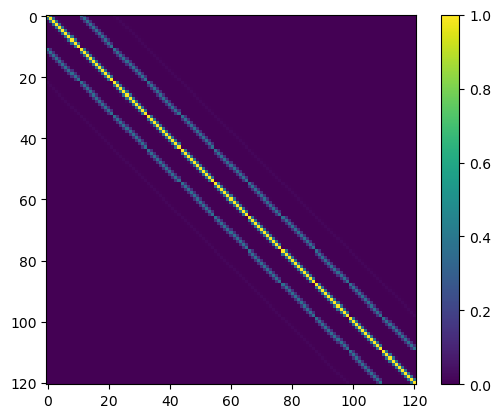

In [56]:
plt.imshow(cov)
plt.colorbar()

In [57]:
f = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)
if np.sum(f<0)>0:
    f = f - np.amin(f) + 0.02

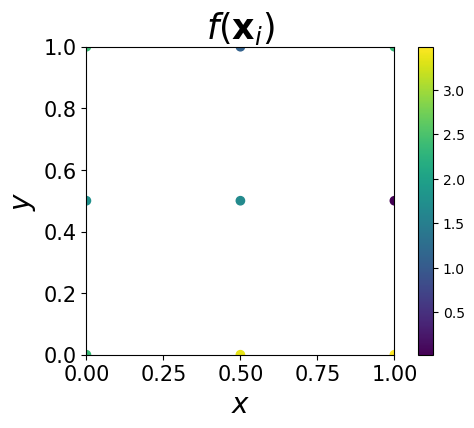

In [427]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(x_grid[:,0], x_grid[:,1], c=f[0])
ax.set_title(r"$f(\mathbf{x}_i)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("2dgrfdelta.svg", bbox_inches='tight')

In [428]:
def RBFinterpolation(f, x_grid, cov, l):
    f_hat = np.dot(np.linalg.inv(cov),f[0])
    
    def function(x):
        l_int = 0.2
        terms = f_hat*np.exp(-np.sum((x - x_grid)**2, axis=-1)/(l**2))
        terms = terms[np.argsort(np.abs(terms))]
        return np.sum(terms)
        # return np.sum(f_hat*np.exp(-np.sum((x - x_grid)**2, axis=-1)/(2*l**2)))
    
    return function

function = RBFinterpolation(f, x_grid, cov, l)

In [34]:
X, Y = np.mgrid[0:1:100*1j, 0:1:100*1j]
x_i = np.vstack([X.ravel(), Y.ravel()]).T

In [430]:
f_i = np.zeros(len(x_i))
for i in range(len(x_i)):
    f_i[i] = function(x_i[i])

0.0002


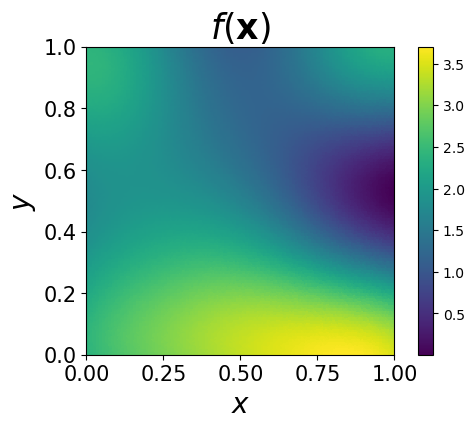

In [431]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x_i[:,0], x_i[:,1], f_i)
ax.set_title(r"$f(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

# plt.savefig("2dRBFint.svg", bbox_inches='tight')
print(np.sum(f_i<0)/len(f_i))

(array([0.07751606, 0.09301928, 0.08597236, 0.066241  , 0.06483162,
        0.07610668, 0.07892545, 0.07610668, 0.08738174, 0.08597236,
        0.09160989, 0.11134126, 0.11979755, 0.12543509, 0.13389138,
        0.14234768, 0.14375706, 0.20999806, 0.25087017, 0.24664202,
        0.27905783, 0.29456104, 0.29878919, 0.38758032, 0.45382132,
        0.54120306, 0.58066579, 0.48200898, 0.43972749, 0.44536502,
        0.45382132, 0.4467744 , 0.44113687, 0.46791515, 0.4552307 ,
        0.4721433 , 0.49469343, 0.59335023, 0.58348455, 0.71596655,
        0.55811566, 0.47778083, 0.44113687, 0.34529883, 0.20999806,
        0.07892545, 0.07187853, 0.06483162, 0.07610668, 0.0746973 ]),
 array([-0.15738232, -0.08642928, -0.01547625,  0.05547679,  0.12642982,
         0.19738286,  0.26833589,  0.33928893,  0.41024196,  0.481195  ,
         0.55214803,  0.62310107,  0.6940541 ,  0.76500714,  0.83596017,
         0.90691321,  0.97786624,  1.04881928,  1.11977232,  1.19072535,
         1.26167839,  1.33

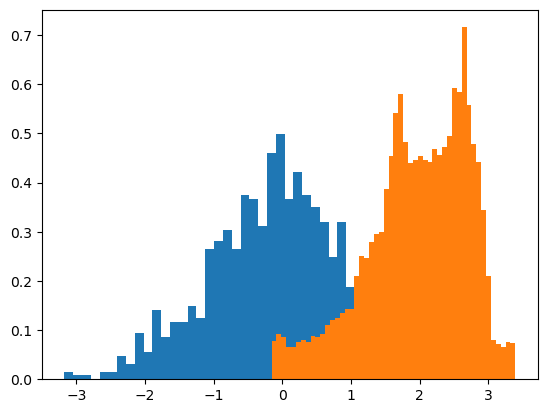

In [415]:
plt.hist(f_gauss, bins=50, density=True)
plt.hist(f_i, bins=50, density=True)

In [49]:
def compute_GRFpoints(l):    
    
    N_gridpoints = int(1/l) + 1
    X, Y = np.mgrid[0:1:N_gridpoints*1j, 0:1:N_gridpoints*1j]
    x_grid = np.vstack([X.ravel(), Y.ravel()]).T
    cov = np.exp(-distance_matrix(x_grid,x_grid, p=2)**2/(l**2))
    f = np.random.multivariate_normal(np.zeros(N_gridpoints**2), cov=cov, size=1)[0]
    
    return cov, x_grid, f

In [50]:
l = 0.2
cov, x_grid, f = compute_GRFpoints(l)

In [58]:
def RBFinterpolation(l, cov, x_grid, f):

    f_hat = np.dot(np.linalg.inv(cov),f)
    
    def function(x):
        terms = f_hat*np.exp(-np.sum((x - x_grid)**2, axis=-1)/(l**2))
        # terms = f_hat*np.exp(-np.sum((x[:,None,:] - x_grid[None,:,:])**2, axis=-1)/(l**2))
        return np.sum(terms)
        return np.sum(terms, axis=1)
    
    return function

In [121]:
class GRF():
    def __init__(self, d, l):
        super().__init__()
        self.d = d
        self.l = l
        self.N_gridpoints = int(1/self.l) + 1
        self.x_grid = self.compute_grid()
        self.cov = self.compute_cov()
        self.f = self.compute_GRFpoints()
        self.f_hat = self.compute_RBFintcoeffs()
        
    def compute_grid(self):
        if self.d==1:
            x_grid = np.linspace(0,1,self.N_gridpoints).reshape((self.N_gridpoints,1))
            print(x_grid)
        if self.d==2:
            X, Y = np.mgrid[0:1:self.N_gridpoints*1j, 0:1:self.N_gridpoints*1j]
            x_grid = np.vstack([X.ravel(), Y.ravel()]).T
        return x_grid
    
    def compute_cov(self):
        cov = np.exp(-distance_matrix(self.x_grid, self.x_grid, p=2)**2/(self.l**2))
        return cov
    
    def compute_GRFpoints(self):
        f = np.random.multivariate_normal(np.zeros(self.N_gridpoints**self.d), cov=self.cov, size=1)[0]
        return f
    
    def compute_RBFintcoeffs(self):
        f_hat = np.dot(np.linalg.inv(self.cov),self.f)
        return f_hat
    
    def RBFinterpolation(self, x):
        terms = self.f_hat*np.exp(-np.sum((x[:,None,:] - self.x_grid[None,:,:])**2, axis=-1)/(self.l**2))
        return np.sum(terms, axis=1)

    def RBFint_pointwise(self, x):
        terms = self.f_hat*np.exp(-np.sum((x - self.x_grid)**2, axis=-1)/(self.l**2))
        return np.sum(terms)

In [122]:
func = GRF(d=1,l=0.4).RBFint_pointwise

[[0. ]
 [0.5]
 [1. ]]
3
(3, 3)


(10000, 36)


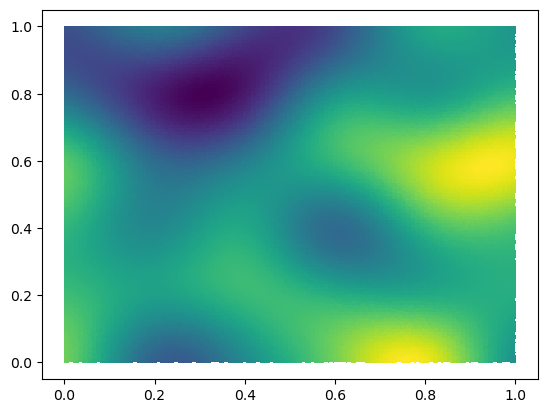

In [53]:
f = function(x_i)

plt.tripcolor(x_i[:,0], x_i[:,1], f)

In [418]:
def normalized_gp_samples(NN, n_samples, length_scale, output_scale, gp_min):
    # GRF sample generation
    def RBF(x, length_scale, output_scale):
        N = x.shape[0]
        dist_mat = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                dist_mat[i,j] = np.linalg.norm(x[i,:] - x[j,:])
        r = (dist_mat/length_scale)**2        
        return output_scale * np.exp(-0.5 * r)

    X = np.zeros([NN**2, 2])
    xv, yv = np.meshgrid(np.linspace(0, 1, NN), np.linspace(0, 1, NN))
    X[:,0] = xv.flatten()
    X[:,1] = yv.flatten()
    
    K = RBF(X, length_scale, output_scale)
    plt.imshow(K)
    plt.show()
    L = np.linalg.cholesky(K + 1e-10*np.eye(NN**2))
    plt.imshow(L)
    plt.show()
    gp_samples = (L @ np.random.randn(NN**2, n_samples)) + gp_min
    min_v, max_v = gp_samples.min(), gp_samples.max()

    #normalized_sm = gp_samples
    normalized_sm = (gp_samples - min_v)/(max_v - min_v) + gp_min * (1 - (gp_samples - min_v)/(max_v - min_v))
    return normalized_sm

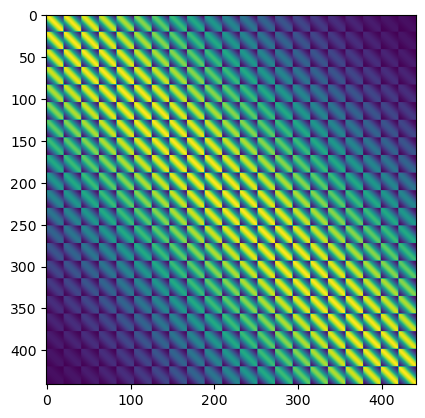

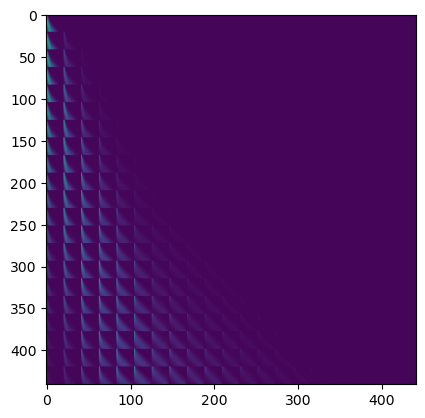

(441, 1)

In [419]:
NN = 21
n_samples = 1
length_scale = 0.4
output_scale = 1
gp_min = 0

X = np.zeros([NN**2, 2])
xv, yv = np.meshgrid(np.linspace(0, 1, NN), np.linspace(0, 1, NN))
X[:,0] = xv.flatten()
X[:,1] = yv.flatten()

g = normalized_gp_samples(NN, n_samples, length_scale, output_scale, gp_min)
g.shape

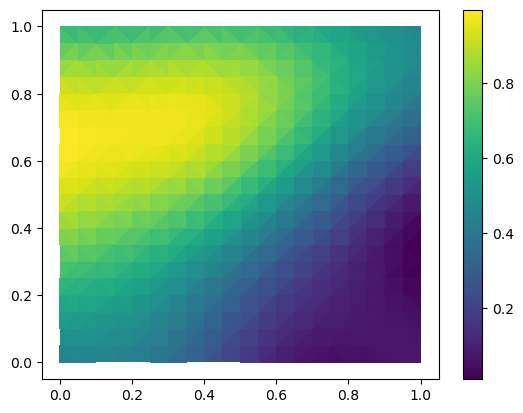

In [420]:
plt.tripcolor(X[:,0], X[:,1], g[:,0])
plt.colorbar()

In [421]:
l = 0.4
N_gridpoints = 21#int(1/l) + 1
X, Y = np.mgrid[0:1:N_gridpoints*1j, 0:1:N_gridpoints*1j]
x_grid = np.vstack([X.ravel(), Y.ravel()]).T
cov = np.exp(-distance_matrix(x_grid,x_grid, p=2)**2/(l**2))

(441, 441)


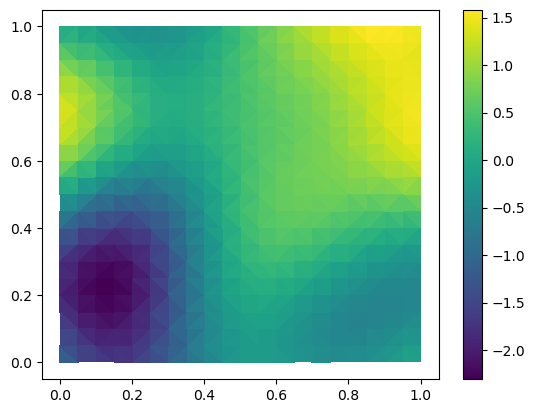

In [422]:
L = np.linalg.cholesky(cov + 1e-10*np.eye(cov.shape[0]))
print(L.shape)
rand = np.random.normal(0,1,size=cov.shape[0])
f = L @ rand
plt.tripcolor(x_grid[:,0], x_grid[:,1], f)
plt.colorbar()

(array([0.11494536, 0.11494536, 0.11494536, 0.1436817 , 0.08620902,
        0.08620902, 0.20115437, 0.08620902, 0.20115437, 0.1436817 ,
        0.02873634, 0.1436817 , 0.1436817 , 0.11494536, 0.08620902,
        0.05747268, 0.02873634, 0.20115437, 0.17241804, 0.05747268,
        0.02873634, 0.05747268, 0.60346312, 0.43104509, 0.37357241,
        0.51725411, 0.45978143, 0.45978143, 0.51725411, 0.43104509,
        0.54599045, 0.45978143, 0.31609973, 0.45978143, 0.37357241,
        0.43104509, 0.43104509, 0.45978143, 0.43104509, 0.40230875,
        0.25862705, 0.20115437, 0.17241804, 0.28736339, 0.20115437,
        0.11494536, 0.25862705, 0.37357241, 0.20115437, 0.08620902]),
 array([-2.31296827, -2.23405865, -2.15514903, -2.07623941, -1.99732978,
        -1.91842016, -1.83951054, -1.76060091, -1.68169129, -1.60278167,
        -1.52387205, -1.44496242, -1.3660528 , -1.28714318, -1.20823355,
        -1.12932393, -1.05041431, -0.97150468, -0.89259506, -0.81368544,
        -0.73477582, -0.65

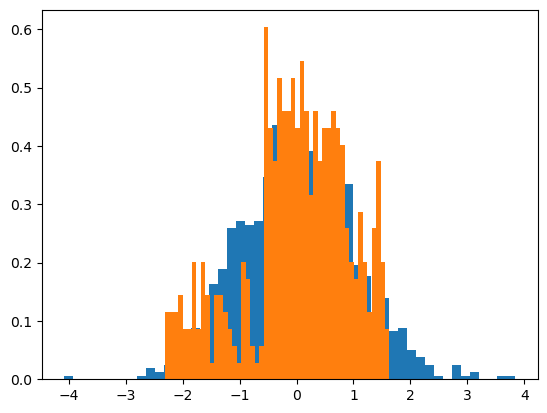

In [423]:
f_gauss = np.random.normal(0,1,1000)
plt.hist(f_gauss, bins=50, density=True)
plt.hist(f, bins=50, density=True)